In [2]:

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mucvK2QUbJpoJGP1RzY1")
project = rf.workspace("tru-projects-7dbwp").project("traffic-voilence-jzchr")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [3]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 16.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


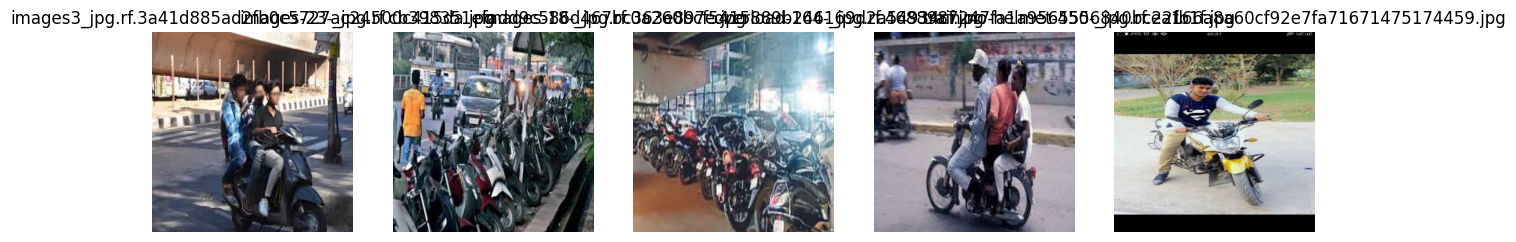

In [4]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

image_dir = "/kaggle/working/traffic-Voilence-1/train/images"  

image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

sample_size = min(5, len(image_files))  

random_images = random.sample(image_files, sample_size)

image_paths = [os.path.join(image_dir, img) for img in random_images]
images = [Image.open(img_path) for img_path in image_paths]

# Show the images
fig, axes = plt.subplots(1, sample_size, figsize=(15, 5))
for ax, img, img_path in zip(axes, images, image_paths):
    ax.imshow(img)
    ax.set_title(os.path.basename(img_path))
    ax.axis('off')

plt.show()


In [5]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  

results = model.train(
    data="/kaggle/working/traffic-Voilence-1/data.yaml", 
    epochs=300,                   
    imgsz=640,           
    batch=16,                  
    project="yolov8-kaggle-training",  
    name="output",   
    cache=True                    
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 86.4MB/s]


Ultralytics 8.3.93 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/traffic-Voilence-1/data.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=yolov8-kaggle-training, name=output, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fa

100%|██████████| 755k/755k [00:00<00:00, 17.8MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 75.2MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/traffic-Voilence-1/train/labels... 752 images, 3 backgrounds, 0 corrupt: 100%|██████████| 752/752 [00:00<00:00, 1125.97it/s]

train: New cache created: /kaggle/working/traffic-Voilence-1/train/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.9GB RAM): 100%|██████████| 752/752 [00:00<00:00, 789.38it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /kaggle/working/traffic-Voilence-1/valid/labels... 188 images, 1 backgrounds, 0 corrupt: 100%|██████████| 188/188 [00:00<00:00, 1297.98it/s]

val: New cache created: /kaggle/working/traffic-Voilence-1/valid/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.2GB RAM): 100%|██████████| 188/188 [00:00<00:00, 216.20it/s]


Plotting labels to yolov8-kaggle-training/output/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to yolov8-kaggle-training/output
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300       2.2G      2.223      3.797      2.264         42        640: 100%|██████████| 47/47 [00:10<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.55it/s]


                   all        188        234    0.00371      0.848       0.16     0.0536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      2.45G        2.1      3.065      2.076         42        640: 100%|██████████| 47/47 [00:08<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.37it/s]


                   all        188        234      0.523      0.148       0.11     0.0239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      2.45G      2.064      2.866      2.131         31        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.17it/s]

                   all        188        234      0.302       0.23      0.111     0.0277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      2.45G      2.091       2.69      2.137         28        640: 100%|██████████| 47/47 [00:08<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.43it/s]


                   all        188        234      0.433     0.0936      0.101     0.0286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      2.45G      2.072       2.58      2.115         35        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.51it/s]


                   all        188        234      0.323      0.115     0.0665     0.0157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      2.45G      2.055      2.443      2.122         38        640: 100%|██████████| 47/47 [00:08<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.54it/s]


                   all        188        234      0.522      0.239      0.103       0.03

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      2.45G      1.956      2.235      1.998         41        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.73it/s]

                   all        188        234      0.294      0.241     0.0965     0.0267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      2.45G      1.927      2.119      1.998         34        640: 100%|██████████| 47/47 [00:08<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.64it/s]


                   all        188        234      0.461      0.222      0.134     0.0431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      2.45G      1.889      2.002      1.934         28        640: 100%|██████████| 47/47 [00:08<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.79it/s]

                   all        188        234      0.308      0.269      0.132     0.0356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      2.45G       1.81      1.907      1.881         34        640: 100%|██████████| 47/47 [00:08<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.62it/s]

                   all        188        234      0.578      0.228      0.182      0.049



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      2.45G        1.8      1.906      1.882         32        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.03it/s]

                   all        188        234      0.429      0.226      0.185     0.0467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      2.45G      1.758       1.81       1.85         27        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.18it/s]

                   all        188        234      0.434      0.195      0.228     0.0871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      2.45G      1.711      1.695      1.812         33        640: 100%|██████████| 47/47 [00:08<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.94it/s]

                   all        188        234      0.396      0.293      0.211     0.0708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      2.45G      1.677      1.676       1.79         39        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.91it/s]

                   all        188        234      0.245      0.236      0.181     0.0463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      2.45G      1.616      1.587      1.769         33        640: 100%|██████████| 47/47 [00:08<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.09it/s]

                   all        188        234      0.619      0.144       0.23      0.065



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      2.45G      1.603      1.613      1.732         37        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.99it/s]

                   all        188        234      0.457      0.124       0.12     0.0359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      2.45G      1.562      1.506      1.703         31        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.93it/s]

                   all        188        234      0.443      0.281      0.237     0.0719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      2.45G      1.559      1.527      1.698         27        640: 100%|██████████| 47/47 [00:08<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.13it/s]

                   all        188        234      0.439      0.272       0.19     0.0615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      2.45G      1.528      1.547      1.697         32        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.09it/s]

                   all        188        234      0.429      0.276      0.214     0.0706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      2.45G      1.503      1.433      1.633         32        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.68it/s]

                   all        188        234       0.28      0.293      0.216     0.0685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      2.45G      1.458      1.393      1.628         23        640: 100%|██████████| 47/47 [00:08<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.14it/s]

                   all        188        234        0.5       0.35      0.331       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      2.45G       1.46      1.452      1.635         31        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.98it/s]

                   all        188        234      0.525      0.282      0.295      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      2.45G      1.365      1.312      1.539         35        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.58it/s]

                   all        188        234      0.267      0.293       0.22       0.07



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      2.45G      1.391      1.338      1.556         39        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.36it/s]

                   all        188        234      0.472       0.29       0.28     0.0854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      2.45G      1.394      1.302      1.553         33        640: 100%|██████████| 47/47 [00:08<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.22it/s]

                   all        188        234      0.308      0.297      0.284     0.0987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      2.45G      1.394      1.335      1.571         36        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.05it/s]

                   all        188        234      0.237      0.272      0.254     0.0889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      2.45G      1.323      1.259       1.52         25        640: 100%|██████████| 47/47 [00:08<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.01it/s]

                   all        188        234       0.37      0.335      0.337      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      2.45G      1.311      1.271      1.509         42        640: 100%|██████████| 47/47 [00:08<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.17it/s]

                   all        188        234      0.212      0.256      0.226     0.0683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      2.45G      1.317      1.249      1.529         27        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.93it/s]

                   all        188        234      0.302      0.279       0.26     0.0857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      2.45G      1.326      1.215       1.53         33        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.73it/s]

                   all        188        234      0.473        0.3      0.312      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      2.45G      1.268      1.243      1.506         29        640: 100%|██████████| 47/47 [00:08<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.87it/s]

                   all        188        234      0.372      0.429      0.308     0.0906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      2.45G      1.295      1.223      1.498         43        640: 100%|██████████| 47/47 [00:08<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.90it/s]

                   all        188        234      0.577      0.316      0.348      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      2.45G      1.279      1.199      1.477         33        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.43it/s]

                   all        188        234      0.452      0.367      0.375      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      2.45G      1.224      1.146      1.447         29        640: 100%|██████████| 47/47 [00:08<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.25it/s]

                   all        188        234      0.423      0.343      0.379      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      2.45G       1.24      1.167       1.46         24        640: 100%|██████████| 47/47 [00:08<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.06it/s]

                   all        188        234      0.249      0.407      0.346      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      2.45G      1.246       1.16      1.457         40        640: 100%|██████████| 47/47 [00:08<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.01it/s]

                   all        188        234       0.34      0.444      0.391      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      2.45G      1.192      1.104      1.442         34        640: 100%|██████████| 47/47 [00:08<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.08it/s]

                   all        188        234      0.349      0.307      0.322       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      2.45G      1.168      1.087      1.408         36        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.93it/s]

                   all        188        234      0.409      0.414      0.398      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      2.45G      1.202      1.128       1.43         33        640: 100%|██████████| 47/47 [00:08<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.32it/s]

                   all        188        234      0.323      0.504      0.325      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      2.45G      1.168      1.066      1.409         46        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.15it/s]

                   all        188        234      0.308      0.333      0.335      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      2.45G       1.16      1.093      1.417         31        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.35it/s]

                   all        188        234      0.452       0.46      0.425      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      2.45G      1.145      1.097      1.399         25        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  6.00it/s]

                   all        188        234      0.421      0.341      0.333      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      2.45G      1.137      1.033      1.367         31        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.64it/s]

                   all        188        234      0.492      0.385      0.417      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      2.45G      1.148      1.076      1.389         37        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.11it/s]

                   all        188        234      0.293      0.442      0.367      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      2.45G      1.138      1.045      1.371         33        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.82it/s]

                   all        188        234      0.422      0.353      0.349      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      2.45G      1.107      1.018      1.364         35        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.25it/s]

                   all        188        234      0.624       0.45      0.456      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      2.45G      1.084     0.9922      1.345         49        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.02it/s]

                   all        188        234      0.342       0.54      0.426      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      2.45G      1.098      1.021      1.358         24        640: 100%|██████████| 47/47 [00:08<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.04it/s]

                   all        188        234      0.417      0.424      0.393      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      2.45G      1.062      1.007      1.339         30        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.03it/s]

                   all        188        234      0.609      0.335      0.386      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      2.45G      1.087      1.042      1.351         33        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.98it/s]

                   all        188        234      0.635      0.354      0.426      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      2.45G      1.057     0.9928      1.319         32        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.15it/s]

                   all        188        234      0.379      0.425      0.398      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      2.45G      1.045     0.9854      1.325         32        640: 100%|██████████| 47/47 [00:08<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.09it/s]

                   all        188        234      0.408      0.403      0.397      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      2.45G      1.054     0.9371      1.301         34        640: 100%|██████████| 47/47 [00:08<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.03it/s]

                   all        188        234      0.453      0.451      0.439      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      2.45G       1.02     0.9317      1.301         41        640: 100%|██████████| 47/47 [00:08<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.05it/s]

                   all        188        234      0.328      0.554      0.433      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      2.45G      1.018     0.9272      1.291         40        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.98it/s]

                   all        188        234      0.433       0.43      0.424      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      2.45G      1.005     0.9235        1.3         29        640: 100%|██████████| 47/47 [00:08<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.30it/s]

                   all        188        234      0.309      0.414      0.343      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      2.45G      1.001     0.9088      1.282         31        640: 100%|██████████| 47/47 [00:08<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.03it/s]

                   all        188        234      0.393      0.432      0.413       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      2.45G      0.996     0.9301      1.275         27        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.89it/s]

                   all        188        234      0.448      0.496      0.454      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      2.45G     0.9722     0.8738      1.266         41        640: 100%|██████████| 47/47 [00:08<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.18it/s]

                   all        188        234       0.63      0.409      0.495      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      2.45G      1.021     0.9243      1.313         32        640: 100%|██████████| 47/47 [00:08<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.96it/s]

                   all        188        234       0.47       0.38      0.421      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      2.45G     0.9613     0.8844      1.261         34        640: 100%|██████████| 47/47 [00:08<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.20it/s]

                   all        188        234      0.473      0.467      0.417      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      2.45G      1.007     0.9436      1.278         26        640: 100%|██████████| 47/47 [00:08<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.22it/s]

                   all        188        234      0.382      0.441       0.39      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      2.45G     0.9798     0.9364      1.277         32        640: 100%|██████████| 47/47 [00:08<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.03it/s]

                   all        188        234      0.492      0.488      0.466      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      2.45G     0.9682     0.9139      1.269         26        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.07it/s]

                   all        188        234      0.399      0.414      0.395      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      2.45G     0.9386     0.8733      1.244         38        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  6.00it/s]

                   all        188        234      0.586       0.48      0.486      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      2.45G     0.9401     0.8898      1.244         35        640: 100%|██████████| 47/47 [00:08<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.69it/s]

                   all        188        234      0.515      0.492      0.419      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      2.45G     0.9614     0.9045      1.259         29        640: 100%|██████████| 47/47 [00:08<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.72it/s]

                   all        188        234      0.354      0.454      0.383      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      2.45G     0.9456     0.8907      1.267         27        640: 100%|██████████| 47/47 [00:08<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.03it/s]

                   all        188        234       0.43      0.506      0.431      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      2.45G     0.9334     0.8989      1.249         32        640: 100%|██████████| 47/47 [00:08<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.98it/s]

                   all        188        234      0.606      0.348      0.443      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      2.45G     0.9283      0.871      1.232         36        640: 100%|██████████| 47/47 [00:08<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.87it/s]

                   all        188        234      0.444       0.44      0.424      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      2.45G     0.9377     0.9102      1.248         32        640: 100%|██████████| 47/47 [00:08<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.84it/s]

                   all        188        234      0.491      0.408      0.424      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      2.45G     0.9035     0.8312      1.221         38        640: 100%|██████████| 47/47 [00:08<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.03it/s]

                   all        188        234      0.478      0.545      0.484      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      2.45G     0.9224     0.8715       1.23         23        640: 100%|██████████| 47/47 [00:08<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.91it/s]

                   all        188        234      0.357      0.391       0.38      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      2.45G     0.8875     0.8369      1.223         37        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.03it/s]

                   all        188        234      0.496      0.464      0.466      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      2.45G     0.8896     0.8414      1.226         32        640: 100%|██████████| 47/47 [00:08<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.09it/s]

                   all        188        234      0.442      0.494      0.476      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      2.45G     0.9034     0.8575      1.229         28        640: 100%|██████████| 47/47 [00:08<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.11it/s]

                   all        188        234      0.311      0.466      0.435      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      2.45G     0.8839      0.823      1.207         31        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.19it/s]

                   all        188        234      0.402      0.517      0.451      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      2.45G      0.907     0.8308      1.233         33        640: 100%|██████████| 47/47 [00:08<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.20it/s]

                   all        188        234      0.424      0.469      0.425       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      2.45G      0.891     0.8445      1.212         32        640: 100%|██████████| 47/47 [00:08<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.32it/s]

                   all        188        234      0.417       0.41      0.427      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      2.45G       0.87     0.8217      1.191         31        640: 100%|██████████| 47/47 [00:08<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.37it/s]

                   all        188        234      0.511      0.351      0.423      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      2.45G      0.886     0.8149      1.212         32        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.88it/s]

                   all        188        234      0.454      0.461      0.431       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      2.45G     0.8492     0.7887      1.199         33        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.88it/s]

                   all        188        234      0.466      0.426      0.433      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      2.45G     0.8398     0.7846      1.189         31        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.13it/s]

                   all        188        234      0.442      0.526      0.479      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      2.45G     0.8553     0.7871      1.199         37        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.15it/s]

                   all        188        234      0.521      0.438      0.443      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      2.45G     0.8338     0.7707       1.19         32        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.05it/s]

                   all        188        234      0.399      0.413       0.39      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      2.45G     0.8326     0.7831      1.179         34        640: 100%|██████████| 47/47 [00:08<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.08it/s]

                   all        188        234      0.377      0.563      0.448      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      2.45G     0.8535     0.7827      1.194         23        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.07it/s]

                   all        188        234      0.359      0.419      0.405      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      2.45G     0.8162     0.7543      1.168         36        640: 100%|██████████| 47/47 [00:08<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.06it/s]

                   all        188        234      0.628      0.364       0.48      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      2.45G     0.8353     0.7902      1.177         40        640: 100%|██████████| 47/47 [00:08<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.47it/s]

                   all        188        234      0.508      0.494      0.488       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      2.45G     0.8416     0.7775      1.192         23        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.21it/s]

                   all        188        234      0.535       0.56      0.506       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      2.45G     0.8072     0.7566      1.163         34        640: 100%|██████████| 47/47 [00:08<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.12it/s]

                   all        188        234      0.425      0.472      0.406      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      2.45G     0.8424     0.7984      1.193         30        640: 100%|██████████| 47/47 [00:08<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.17it/s]

                   all        188        234      0.402      0.339      0.361      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      2.45G     0.8249     0.7736       1.17         35        640: 100%|██████████| 47/47 [00:08<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.09it/s]

                   all        188        234      0.494      0.475      0.497      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      2.45G     0.8138     0.7643      1.163         28        640: 100%|██████████| 47/47 [00:08<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.05it/s]

                   all        188        234      0.533      0.474      0.492      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      2.45G     0.7959     0.7532      1.153         25        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.07it/s]

                   all        188        234      0.519      0.443      0.462      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      2.45G     0.7831     0.7337       1.16         33        640: 100%|██████████| 47/47 [00:08<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.01it/s]

                   all        188        234      0.349      0.503      0.432      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      2.45G     0.7999      0.751      1.153         45        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.95it/s]

                   all        188        234      0.417      0.444      0.431      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      2.45G     0.7932     0.7285      1.159         25        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.08it/s]

                   all        188        234       0.36      0.545      0.418      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      2.45G     0.7904      0.742      1.153         33        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.81it/s]

                   all        188        234      0.425      0.493      0.423      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      2.45G     0.7849     0.7395      1.147         28        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.88it/s]

                   all        188        234      0.368      0.505      0.417      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      2.45G     0.7885     0.7486       1.15         37        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.99it/s]

                   all        188        234      0.337      0.505      0.408      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      2.45G     0.7888     0.7303      1.166         43        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.01it/s]

                   all        188        234      0.462      0.431      0.431      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      2.45G     0.7773     0.7088      1.148         36        640: 100%|██████████| 47/47 [00:08<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.00it/s]

                   all        188        234      0.472      0.474      0.414      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      2.45G     0.7434      0.727      1.128         33        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.85it/s]

                   all        188        234      0.481      0.525      0.483        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      2.45G     0.7708       0.73      1.138         25        640: 100%|██████████| 47/47 [00:08<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.89it/s]

                   all        188        234      0.505       0.45      0.467      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      2.45G     0.7588     0.7034      1.124         38        640: 100%|██████████| 47/47 [00:08<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.84it/s]

                   all        188        234      0.429      0.484      0.457      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      2.45G      0.774     0.6948      1.135         28        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.03it/s]

                   all        188        234      0.384      0.486      0.419      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      2.45G     0.7734     0.7134      1.143         33        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.95it/s]

                   all        188        234      0.502      0.412      0.487      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      2.45G     0.7347     0.6879      1.129         29        640: 100%|██████████| 47/47 [00:08<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.16it/s]

                   all        188        234      0.511      0.498      0.493        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      2.45G     0.7742     0.7062      1.154         27        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.03it/s]

                   all        188        234      0.415      0.502      0.491       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      2.45G     0.7959     0.7369      1.153         27        640: 100%|██████████| 47/47 [00:08<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.95it/s]

                   all        188        234      0.463      0.465      0.468      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      2.45G     0.7457     0.6993      1.124         35        640: 100%|██████████| 47/47 [00:08<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.68it/s]

                   all        188        234      0.489      0.485      0.468      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      2.45G     0.7535     0.7032      1.128         24        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.94it/s]

                   all        188        234      0.497      0.547      0.501      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      2.45G     0.7482     0.7121      1.138         26        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.87it/s]

                   all        188        234      0.497      0.604      0.481      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      2.45G     0.7247     0.6889      1.114         29        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.02it/s]

                   all        188        234      0.578      0.445      0.516      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      2.45G     0.7186     0.7018      1.112         22        640: 100%|██████████| 47/47 [00:08<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.14it/s]

                   all        188        234      0.404      0.517      0.399      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      2.45G     0.7304     0.7153       1.12         25        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.92it/s]

                   all        188        234       0.49      0.508      0.454      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      2.45G     0.7071     0.6898      1.116         32        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.07it/s]

                   all        188        234      0.439      0.472      0.451      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      2.45G     0.7676     0.7245      1.154         38        640: 100%|██████████| 47/47 [00:08<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.07it/s]

                   all        188        234      0.367      0.455      0.366      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      2.45G     0.7251     0.7016      1.119         29        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.13it/s]

                   all        188        234      0.385      0.562      0.496       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      2.45G     0.7111     0.6874      1.108         28        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.23it/s]

                   all        188        234      0.479      0.453      0.421      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      2.45G     0.7073     0.6582      1.109         31        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.59it/s]

                   all        188        234      0.366      0.482      0.382      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      2.45G     0.7167     0.6971      1.114         42        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.00it/s]

                   all        188        234      0.464      0.414      0.398      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      2.45G     0.7084     0.6723       1.11         30        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.20it/s]

                   all        188        234      0.417      0.497      0.447      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      2.45G      0.712     0.6784      1.103         24        640: 100%|██████████| 47/47 [00:08<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.98it/s]

                   all        188        234      0.513      0.464      0.443      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      2.45G     0.7208      0.677      1.106         33        640: 100%|██████████| 47/47 [00:08<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.33it/s]

                   all        188        234      0.371       0.46      0.377      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      2.45G     0.7218     0.6705      1.107         36        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.94it/s]

                   all        188        234      0.555       0.54      0.504      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      2.45G     0.6984     0.6612      1.098         27        640: 100%|██████████| 47/47 [00:08<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.94it/s]

                   all        188        234      0.571      0.526       0.54      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      2.45G     0.6957     0.6653      1.095         31        640: 100%|██████████| 47/47 [00:08<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.95it/s]

                   all        188        234      0.531      0.478      0.483      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      2.45G     0.7221     0.6674      1.109         28        640: 100%|██████████| 47/47 [00:08<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.11it/s]

                   all        188        234      0.391      0.504      0.418      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      2.45G     0.6962     0.6585      1.094         38        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.71it/s]

                   all        188        234      0.616      0.496      0.548      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      2.45G     0.7234      0.676       1.11         22        640: 100%|██████████| 47/47 [00:08<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.94it/s]

                   all        188        234      0.533      0.554      0.519      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      2.45G     0.6938     0.6646      1.111         29        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.93it/s]

                   all        188        234      0.484      0.537       0.51      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      2.45G     0.6871     0.6652      1.091         30        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.97it/s]

                   all        188        234      0.444        0.5       0.49      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      2.45G     0.6901     0.6433      1.091         30        640: 100%|██████████| 47/47 [00:08<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.98it/s]

                   all        188        234       0.41      0.573      0.484      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      2.45G       0.68     0.6464      1.094         38        640: 100%|██████████| 47/47 [00:08<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.05it/s]

                   all        188        234       0.46      0.523       0.46      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      2.45G     0.6862     0.6406       1.09         28        640: 100%|██████████| 47/47 [00:08<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  6.00it/s]

                   all        188        234      0.454      0.518      0.455      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      2.45G     0.6934     0.6468      1.097         34        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.17it/s]

                   all        188        234      0.509      0.537      0.466      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      2.45G     0.6568     0.6406       1.08         31        640: 100%|██████████| 47/47 [00:08<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.98it/s]

                   all        188        234      0.646      0.417      0.529      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      2.45G     0.6792     0.6452      1.088         31        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.91it/s]

                   all        188        234      0.505      0.493      0.518      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      2.45G     0.6715      0.647      1.094         26        640: 100%|██████████| 47/47 [00:08<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.18it/s]

                   all        188        234      0.436      0.529      0.474      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      2.45G     0.6928     0.6693      1.101         36        640: 100%|██████████| 47/47 [00:08<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.90it/s]

                   all        188        234      0.494      0.594       0.49      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      2.45G     0.6966     0.6681      1.102         35        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.19it/s]

                   all        188        234      0.494      0.461      0.479      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      2.45G     0.6661     0.6434      1.077         32        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.52it/s]

                   all        188        234      0.528      0.517      0.519      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      2.45G     0.6522     0.6239      1.074         45        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.27it/s]

                   all        188        234       0.57      0.554      0.537      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      2.45G     0.6467      0.624      1.084         26        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.77it/s]

                   all        188        234      0.542        0.5      0.483      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      2.45G     0.6508     0.6288      1.071         31        640: 100%|██████████| 47/47 [00:08<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.73it/s]

                   all        188        234      0.427      0.446       0.43      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      2.45G     0.6539     0.6219      1.076         27        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.98it/s]

                   all        188        234       0.45      0.485      0.427      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      2.45G     0.6748     0.6502       1.09         40        640: 100%|██████████| 47/47 [00:08<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.98it/s]

                   all        188        234      0.446      0.603      0.502      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      2.45G      0.629     0.6013      1.061         33        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.73it/s]

                   all        188        234      0.451      0.478      0.453      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      2.45G     0.6526     0.6133      1.072         27        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.99it/s]

                   all        188        234      0.487      0.566      0.504      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      2.45G     0.6466     0.6312       1.06         38        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.07it/s]

                   all        188        234      0.531       0.58      0.528      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      2.45G     0.6379     0.6022      1.062         39        640: 100%|██████████| 47/47 [00:08<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.05it/s]

                   all        188        234       0.47      0.468      0.491      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      2.45G     0.6512     0.6215      1.072         38        640: 100%|██████████| 47/47 [00:08<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.06it/s]

                   all        188        234      0.416      0.577      0.517      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      2.45G     0.6431      0.606      1.065         33        640: 100%|██████████| 47/47 [00:08<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.91it/s]

                   all        188        234      0.541      0.535      0.532      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      2.45G     0.6813     0.6274      1.082         30        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.05it/s]

                   all        188        234      0.531       0.47      0.484        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      2.45G     0.6573     0.6341      1.084         40        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.20it/s]

                   all        188        234      0.653      0.467      0.531      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      2.45G     0.6365     0.6196      1.055         29        640: 100%|██████████| 47/47 [00:08<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.13it/s]

                   all        188        234      0.475      0.532      0.505      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      2.45G     0.6377     0.6289      1.058         31        640: 100%|██████████| 47/47 [00:08<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.90it/s]

                   all        188        234      0.583      0.569      0.568      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      2.45G     0.6241     0.6006      1.051         35        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.79it/s]

                   all        188        234      0.509      0.473      0.495       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      2.45G     0.6384     0.6119      1.074         31        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.29it/s]

                   all        188        234      0.452      0.624        0.5      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      2.45G     0.6307     0.5998      1.057         29        640: 100%|██████████| 47/47 [00:08<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.10it/s]

                   all        188        234      0.431      0.548      0.505      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      2.45G     0.6321     0.6045      1.058         36        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.01it/s]

                   all        188        234      0.478       0.49       0.47      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      2.45G     0.6101     0.5736      1.061         34        640: 100%|██████████| 47/47 [00:08<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.01it/s]

                   all        188        234      0.396      0.528       0.44      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      2.45G     0.6138     0.5992      1.048         38        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.07it/s]

                   all        188        234      0.552      0.466      0.515      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      2.45G     0.6269     0.5971      1.052         33        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.25it/s]

                   all        188        234      0.529      0.492      0.495      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      2.45G     0.5844     0.5732      1.023         31        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.01it/s]

                   all        188        234      0.388       0.54      0.463      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      2.45G     0.6015     0.5667      1.041         33        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.35it/s]

                   all        188        234      0.608      0.355      0.507      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      2.45G     0.6158     0.5919      1.045         35        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.02it/s]

                   all        188        234      0.536      0.423      0.476      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      2.45G     0.6136     0.6011       1.05         28        640: 100%|██████████| 47/47 [00:08<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.20it/s]

                   all        188        234      0.373      0.522      0.406      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      2.45G     0.5988     0.5915       1.04         32        640: 100%|██████████| 47/47 [00:08<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.92it/s]

                   all        188        234      0.459      0.608      0.494      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      2.45G     0.6354     0.6099      1.057         38        640: 100%|██████████| 47/47 [00:08<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.99it/s]

                   all        188        234      0.484      0.545      0.467      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      2.45G     0.6085     0.5823      1.031         29        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.02it/s]

                   all        188        234      0.462      0.511       0.46       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      2.45G     0.6013     0.5949       1.04         33        640: 100%|██████████| 47/47 [00:08<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.11it/s]

                   all        188        234      0.452       0.53       0.44       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      2.45G     0.5947     0.5762      1.038         26        640: 100%|██████████| 47/47 [00:08<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.07it/s]

                   all        188        234      0.484      0.495      0.472      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      2.45G     0.5865     0.5735       1.04         36        640: 100%|██████████| 47/47 [00:08<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.92it/s]

                   all        188        234      0.484      0.578      0.487      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      2.45G     0.5964     0.5781       1.04         44        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.07it/s]

                   all        188        234      0.412       0.55      0.458      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      2.45G     0.6056     0.5859      1.039         30        640: 100%|██████████| 47/47 [00:08<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.62it/s]

                   all        188        234      0.473      0.486       0.44      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      2.45G     0.5888     0.5644      1.027         32        640: 100%|██████████| 47/47 [00:08<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.12it/s]

                   all        188        234       0.43      0.538      0.463      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      2.45G     0.6069     0.5842      1.046         35        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.12it/s]

                   all        188        234      0.529      0.563      0.497      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      2.45G     0.5633      0.558      1.027         46        640: 100%|██████████| 47/47 [00:08<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.27it/s]

                   all        188        234      0.481      0.578      0.484      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      2.45G     0.5895     0.5781      1.029         36        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.02it/s]

                   all        188        234      0.524      0.573      0.534      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      2.45G     0.6039     0.5821      1.047         40        640: 100%|██████████| 47/47 [00:08<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  6.00it/s]

                   all        188        234      0.577       0.62      0.576      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      2.45G      0.598      0.579      1.039         45        640: 100%|██████████| 47/47 [00:08<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.04it/s]

                   all        188        234       0.48      0.617       0.52      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      2.45G     0.5764     0.5614      1.024         34        640: 100%|██████████| 47/47 [00:08<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.09it/s]

                   all        188        234      0.614      0.549      0.534       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      2.45G     0.5844     0.5493      1.023         34        640: 100%|██████████| 47/47 [00:08<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.93it/s]

                   all        188        234      0.654      0.526      0.562      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      2.45G     0.5998     0.5805      1.044         36        640: 100%|██████████| 47/47 [00:08<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.89it/s]

                   all        188        234      0.522      0.531      0.512      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300      2.45G     0.5745     0.5494      1.028         33        640: 100%|██████████| 47/47 [00:08<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.86it/s]

                   all        188        234      0.516      0.487      0.484      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      2.45G     0.5754     0.5501      1.024         35        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.13it/s]

                   all        188        234      0.544      0.482      0.497      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      2.45G     0.5633     0.5436      1.033         39        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.28it/s]

                   all        188        234       0.51      0.535      0.494      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      2.45G     0.5987      0.568      1.037         36        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.75it/s]

                   all        188        234      0.551      0.614      0.519      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      2.45G     0.5754     0.5412      1.026         28        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.13it/s]

                   all        188        234      0.417      0.451      0.413      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      2.45G     0.5484     0.5478      1.012         34        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.02it/s]

                   all        188        234       0.48      0.586      0.465      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      2.45G     0.5455     0.5237      1.003         32        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.11it/s]

                   all        188        234      0.393      0.489      0.412      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      2.45G     0.5598      0.539      1.018         26        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  6.00it/s]

                   all        188        234      0.486      0.448      0.407      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      2.45G     0.5603     0.5349      1.013         29        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.93it/s]

                   all        188        234      0.428      0.462      0.442      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      2.45G     0.5839     0.5605      1.029         33        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.10it/s]

                   all        188        234      0.528      0.523      0.488      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      2.45G     0.5377     0.5402      1.013         31        640: 100%|██████████| 47/47 [00:08<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.21it/s]

                   all        188        234      0.501      0.594      0.484      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      2.45G     0.5509     0.5392       1.01         33        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.75it/s]

                   all        188        234      0.477      0.544      0.469      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      2.45G     0.5576     0.5261      1.012         28        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.07it/s]

                   all        188        234      0.464      0.532       0.48      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      2.45G      0.555     0.5341      1.009         43        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.62it/s]

                   all        188        234       0.45      0.511      0.456      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      2.45G     0.5607     0.5448      1.017         38        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.17it/s]

                   all        188        234      0.394      0.563      0.431      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      2.45G     0.5464     0.5184      1.013         26        640: 100%|██████████| 47/47 [00:08<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.32it/s]

                   all        188        234      0.437      0.516      0.475      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      2.45G     0.5557     0.5256      1.026         31        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.09it/s]

                   all        188        234      0.563      0.527      0.516      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      2.45G      0.548      0.519      1.017         34        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.12it/s]

                   all        188        234      0.495      0.506      0.517        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      2.45G     0.5591     0.5326      1.025         40        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.05it/s]

                   all        188        234       0.46      0.553      0.478      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      2.45G     0.5359     0.5202      1.007         37        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.35it/s]

                   all        188        234      0.439      0.586       0.49      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      2.45G     0.5442     0.5286      1.015         38        640: 100%|██████████| 47/47 [00:08<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.99it/s]

                   all        188        234      0.464      0.522      0.456      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      2.45G     0.5595     0.5369      1.027         35        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.17it/s]

                   all        188        234      0.511      0.484      0.445      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      2.45G     0.5463     0.5192      1.017         37        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.14it/s]

                   all        188        234      0.438       0.57      0.451       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      2.45G     0.5358      0.518      1.001         38        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.77it/s]

                   all        188        234      0.338      0.536      0.403      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      2.45G     0.5272     0.5087      1.002         40        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.97it/s]

                   all        188        234      0.455      0.535       0.47      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      2.45G     0.5244     0.5131     0.9958         34        640: 100%|██████████| 47/47 [00:08<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.98it/s]

                   all        188        234      0.472      0.511      0.487      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      2.45G     0.5286     0.5185      1.007         42        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.91it/s]

                   all        188        234      0.523       0.56      0.511      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      2.45G     0.5247     0.5086      1.001         31        640: 100%|██████████| 47/47 [00:08<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.15it/s]

                   all        188        234      0.463      0.512       0.47       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      2.45G     0.5286     0.5156      1.005         26        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.27it/s]

                   all        188        234      0.503      0.554       0.48      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      2.45G     0.5259     0.5026     0.9988         43        640: 100%|██████████| 47/47 [00:08<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.06it/s]

                   all        188        234      0.482      0.519      0.444      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      2.45G     0.5389     0.5251      1.013         32        640: 100%|██████████| 47/47 [00:08<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.24it/s]

                   all        188        234      0.534      0.519      0.491      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      2.45G     0.5072     0.4939     0.9912         27        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.33it/s]

                   all        188        234       0.59        0.5      0.523      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      2.45G     0.5128     0.4904     0.9982         33        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.15it/s]

                   all        188        234      0.494      0.456      0.445      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      2.45G     0.4975     0.5044     0.9786         29        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.85it/s]

                   all        188        234      0.475      0.541      0.466      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      2.45G     0.5253      0.498     0.9948         45        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.87it/s]

                   all        188        234      0.455      0.571      0.451      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      2.45G     0.5028     0.4944     0.9859         33        640: 100%|██████████| 47/47 [00:08<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.03it/s]

                   all        188        234      0.446      0.541      0.422      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300      2.45G     0.5019     0.5043     0.9741         30        640: 100%|██████████| 47/47 [00:08<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.68it/s]

                   all        188        234      0.427      0.517       0.43      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      2.45G     0.5044     0.4976     0.9898         19        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.00it/s]

                   all        188        234      0.477      0.475      0.452      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      2.45G     0.5068     0.4981     0.9855         34        640: 100%|██████████| 47/47 [00:08<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.89it/s]

                   all        188        234      0.434      0.518      0.444      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300      2.45G     0.5198      0.507      1.009         32        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.18it/s]

                   all        188        234      0.518      0.532       0.49      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      2.45G     0.5147      0.508     0.9919         38        640: 100%|██████████| 47/47 [00:08<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.10it/s]

                   all        188        234      0.536      0.515       0.54      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      2.45G     0.4917     0.4701     0.9802         35        640: 100%|██████████| 47/47 [00:08<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.90it/s]

                   all        188        234      0.501      0.569      0.548        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      2.45G     0.5248     0.4949      1.008         34        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.15it/s]

                   all        188        234      0.463      0.623      0.528      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      2.45G     0.4869     0.4666     0.9707         28        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.19it/s]

                   all        188        234      0.476      0.616       0.54        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300      2.45G     0.5153     0.5162     0.9977         36        640: 100%|██████████| 47/47 [00:08<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.76it/s]

                   all        188        234      0.586      0.488      0.527      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300      2.45G     0.4927     0.4944      0.983         30        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  6.00it/s]

                   all        188        234      0.482      0.535      0.449      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300      2.45G      0.508     0.4767     0.9977         27        640: 100%|██████████| 47/47 [00:08<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.67it/s]

                   all        188        234      0.479      0.552      0.463      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300      2.45G     0.5052     0.4918     0.9935         36        640: 100%|██████████| 47/47 [00:08<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.07it/s]

                   all        188        234      0.486      0.608      0.522        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      2.45G     0.5076     0.4919     0.9944         28        640: 100%|██████████| 47/47 [00:08<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.98it/s]

                   all        188        234      0.424      0.517      0.438      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300      2.45G     0.4968     0.4659     0.9877         34        640: 100%|██████████| 47/47 [00:08<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.90it/s]

                   all        188        234      0.416      0.578      0.439       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300      2.45G      0.469     0.4576      0.971         28        640: 100%|██████████| 47/47 [00:08<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.12it/s]

                   all        188        234      0.465      0.592      0.492      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300      2.45G     0.4738     0.4533     0.9654         31        640: 100%|██████████| 47/47 [00:08<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.18it/s]

                   all        188        234      0.461      0.563      0.466       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300      2.45G     0.5007     0.4771     0.9757         34        640: 100%|██████████| 47/47 [00:08<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.15it/s]

                   all        188        234      0.464      0.467       0.44      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300      2.45G     0.4904     0.4836     0.9853         35        640: 100%|██████████| 47/47 [00:08<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.28it/s]

                   all        188        234      0.457      0.456      0.449       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300      2.45G     0.4672      0.477     0.9692         31        640: 100%|██████████| 47/47 [00:08<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.24it/s]

                   all        188        234      0.535      0.437      0.457      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300      2.45G     0.4934     0.4791     0.9895         31        640: 100%|██████████| 47/47 [00:08<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.09it/s]

                   all        188        234      0.496       0.52      0.475      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300      2.45G      0.465      0.444     0.9801         29        640: 100%|██████████| 47/47 [00:08<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.89it/s]

                   all        188        234      0.473      0.502      0.433      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300      2.45G     0.4613     0.4478     0.9671         36        640: 100%|██████████| 47/47 [00:08<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.93it/s]

                   all        188        234      0.481      0.542      0.442      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300      2.45G     0.4804     0.4694     0.9827         38        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.96it/s]

                   all        188        234       0.46       0.58       0.49      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300      2.45G     0.4696     0.4499     0.9656         32        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.06it/s]

                   all        188        234      0.516      0.552      0.519      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300      2.45G     0.4676     0.4543     0.9688         28        640: 100%|██████████| 47/47 [00:08<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.23it/s]

                   all        188        234      0.447      0.504      0.453      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300      2.45G     0.4737     0.4578      0.969         32        640: 100%|██████████| 47/47 [00:08<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.89it/s]

                   all        188        234      0.465      0.473       0.45      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300      2.45G     0.4665     0.4435     0.9713         30        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.07it/s]

                   all        188        234      0.505      0.503       0.46      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300      2.45G     0.4689     0.4528     0.9659         38        640: 100%|██████████| 47/47 [00:08<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.98it/s]

                   all        188        234      0.488       0.52      0.427      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300      2.45G     0.4617     0.4298     0.9728         40        640: 100%|██████████| 47/47 [00:08<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.94it/s]

                   all        188        234      0.425      0.569       0.46      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300      2.45G     0.4793     0.4637      0.974         40        640: 100%|██████████| 47/47 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.12it/s]

                   all        188        234      0.506      0.503      0.467      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300      2.45G      0.464     0.4441     0.9637         30        640: 100%|██████████| 47/47 [00:08<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.13it/s]

                   all        188        234      0.457      0.576      0.445      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/300      2.45G     0.4765     0.4755      0.969         37        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.21it/s]

                   all        188        234      0.521       0.58      0.521      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/300      2.45G     0.4564     0.4506     0.9589         30        640: 100%|██████████| 47/47 [00:08<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.20it/s]

                   all        188        234      0.526      0.516      0.485      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/300      2.45G     0.4585     0.4545      0.969         27        640: 100%|██████████| 47/47 [00:08<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.54it/s]

                   all        188        234      0.434      0.486      0.421      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/300      2.45G     0.4727     0.4536     0.9813         38        640: 100%|██████████| 47/47 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.96it/s]

                   all        188        234      0.433      0.488      0.413      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/300      2.45G     0.4884     0.4645     0.9825         41        640: 100%|██████████| 47/47 [00:08<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.25it/s]

                   all        188        234      0.497      0.464      0.442      0.173
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 159, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



259 epochs completed in 0.703 hours.
Optimizer stripped from yolov8-kaggle-training/output/weights/last.pt, 6.3MB
Optimizer stripped from yolov8-kaggle-training/output/weights/best.pt, 6.3MB

Validating yolov8-kaggle-training/output/weights/best.pt...
Ultralytics 8.3.93 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.80it/s]


                   all        188        234      0.584      0.569      0.567      0.223
            No Parking          7          7      0.681      0.714      0.631      0.147
    Not Wearing Helmet        139        163      0.499       0.38       0.35      0.088
         Triple Riding         15         15      0.753      0.667      0.799      0.388
Usage Of Phone While Riding         23         23      0.231       0.13      0.111     0.0363
              Wheeling         26         26      0.756      0.951      0.946      0.454


invalid value encountered in less
invalid value encountered in less


Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to yolov8-kaggle-training/output


In [ ]:
dsffhg xcxz xdgrdffmh vbhgfhy fgrdghg fgfhfgg m fsds dfd dfd dfd 
sadsb ads dfg ghg fgfgsf

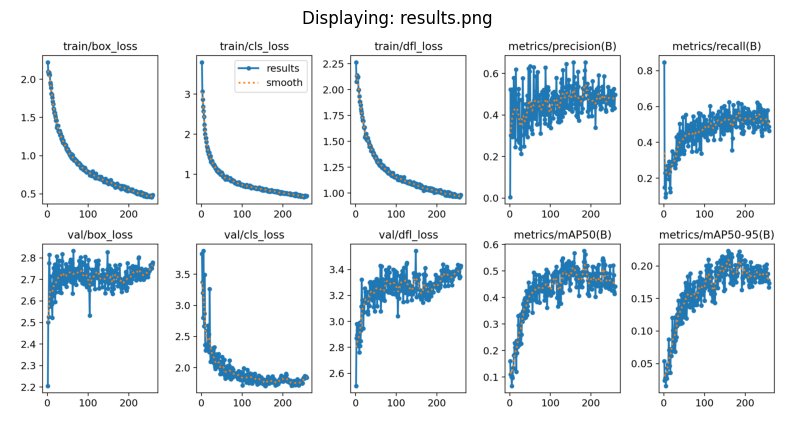

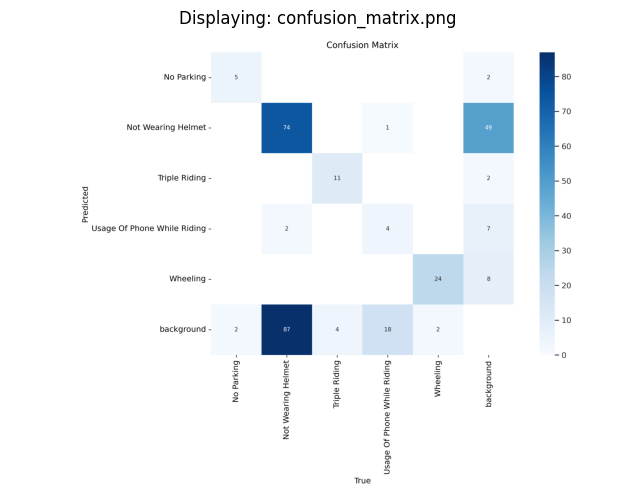

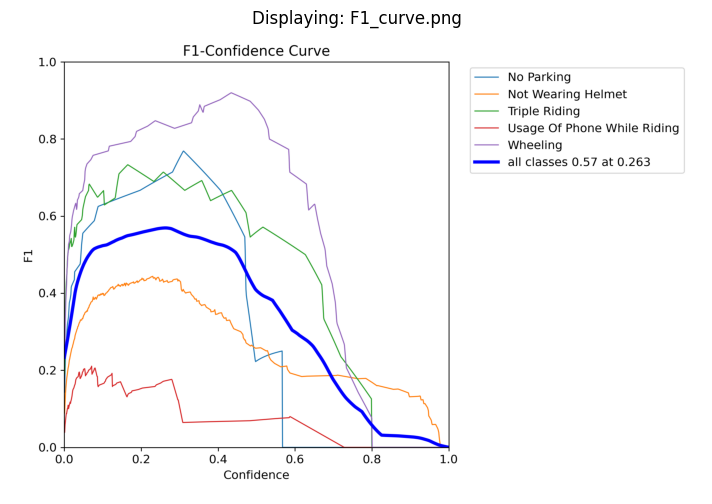

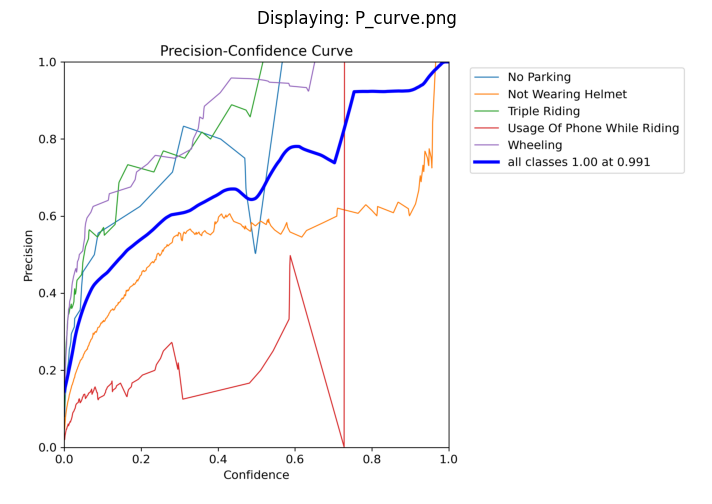

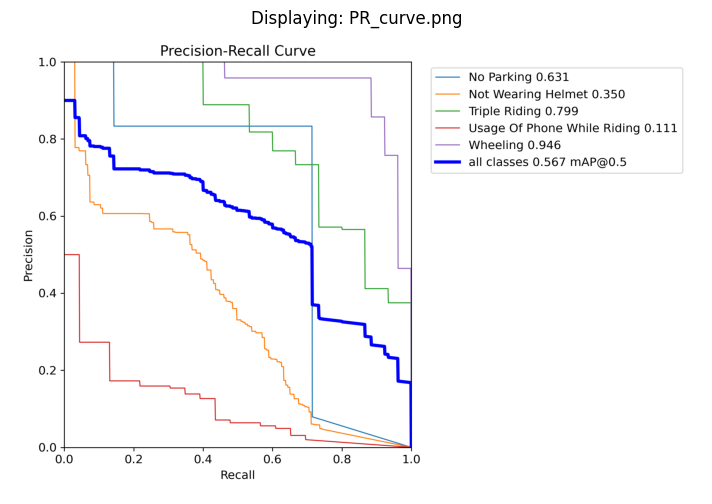

In [7]:
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

results_dir = "/kaggle/working/yolov8-kaggle-training/output"

plot_files = [
    "results.png",              
    "confusion_matrix.png",       
    "F1_curve.png", 
    "P_curve.png",
    "PR_curve.png",             
]

for plot_file in plot_files:
    plot_path = os.path.join(results_dir, plot_file)
    
    if os.path.exists(plot_path):
        img = mpimg.imread(plot_path)
        
        plt.figure(figsize=(10, 6))
        plt.imshow(img)
        plt.axis('off')  
        plt.title(f"Displaying: {plot_file}")
        plt.show()
    else:
        print(f"{plot_file} not found in {results_dir}")
